In [1]:
# import libraries required for this task

import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as functional
import torch.nn.utils.prune as prune 

from torchvision.transforms import ToTensor
from torchvision import  datasets

import numpy as np
from scipy.stats import rankdata
from collections import OrderedDict
from numpy import linalg 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# selection of device and dataset creation

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

train = datasets.MNIST('', train=True, download=True,transform=ToTensor())
test = datasets.MNIST('', train=False, download=True,transform=ToTensor())

batch_size = 7

train_dataset = DataLoader(train, batch_size=batch_size, shuffle=True)
test_dataset = DataLoader(test, batch_size=batch_size, shuffle=False)

Using cpu device


In [20]:
# Neuralnet model impelementation using the provided task instruction

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 1000, bias=False)
        self.fc2 = nn.Linear(1000, 1000, bias=False)
        self.fc3 = nn.Linear(1000, 500, bias=False)
        self.fc4 = nn.Linear(500, 200, bias=False)
        self.fc5 = nn.Linear(200, 10, bias=False)
        
    def forward(self, x):
        x = functional.relu(self.fc1(x))
        x = functional.relu(self.fc2(x))
        x = functional.relu(self.fc3(x))
        x = functional.relu(self.fc4(x))
        x = self.fc5(x)
        return functional.log_softmax(x, dim=1)

model = NeuralNet()
print(model)



NeuralNet(
  (fc1): Linear(in_features=784, out_features=1000, bias=False)
  (fc2): Linear(in_features=1000, out_features=1000, bias=False)
  (fc3): Linear(in_features=1000, out_features=500, bias=False)
  (fc4): Linear(in_features=500, out_features=200, bias=False)
  (fc5): Linear(in_features=200, out_features=10, bias=False)
)


In [21]:
# Declaring loss as crossentropy function and opmizer function as SGD

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [22]:
# Train function decleration

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X.view(-1,784))
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [23]:
# testing function decleration

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X.view(-1,784))
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Result: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct

In [24]:
# Traing phase

epochs = 7
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataset, model, loss_fn, optimizer)
    test(test_dataset, model, loss_fn)
print("Training is done!")

Epoch 1
-------------------------------
loss: 2.303744  [    0/60000]
loss: 2.304600  [  700/60000]
loss: 2.302722  [ 1400/60000]
loss: 2.302054  [ 2100/60000]
loss: 2.300972  [ 2800/60000]
loss: 2.299482  [ 3500/60000]
loss: 2.303353  [ 4200/60000]
loss: 2.303372  [ 4900/60000]
loss: 2.301974  [ 5600/60000]
loss: 2.302824  [ 6300/60000]
loss: 2.302366  [ 7000/60000]
loss: 2.299838  [ 7700/60000]
loss: 2.304569  [ 8400/60000]
loss: 2.300370  [ 9100/60000]
loss: 2.300874  [ 9800/60000]
loss: 2.298204  [10500/60000]
loss: 2.305406  [11200/60000]
loss: 2.300513  [11900/60000]
loss: 2.300972  [12600/60000]
loss: 2.292707  [13300/60000]
loss: 2.301047  [14000/60000]
loss: 2.297348  [14700/60000]
loss: 2.297167  [15400/60000]
loss: 2.297240  [16100/60000]
loss: 2.300055  [16800/60000]
loss: 2.299230  [17500/60000]
loss: 2.300952  [18200/60000]
loss: 2.296180  [18900/60000]
loss: 2.296384  [19600/60000]
loss: 2.297400  [20300/60000]
loss: 2.298769  [21000/60000]
loss: 2.293480  [21700/60000]


loss: 0.592299  [ 3500/60000]
loss: 0.343283  [ 4200/60000]
loss: 0.491534  [ 4900/60000]
loss: 0.169804  [ 5600/60000]
loss: 0.532944  [ 6300/60000]
loss: 0.802433  [ 7000/60000]
loss: 0.394602  [ 7700/60000]
loss: 0.466166  [ 8400/60000]
loss: 0.158763  [ 9100/60000]
loss: 0.668184  [ 9800/60000]
loss: 0.758083  [10500/60000]
loss: 0.925226  [11200/60000]
loss: 0.411907  [11900/60000]
loss: 0.404014  [12600/60000]
loss: 0.164542  [13300/60000]
loss: 0.488603  [14000/60000]
loss: 0.638701  [14700/60000]
loss: 0.257769  [15400/60000]
loss: 0.221159  [16100/60000]
loss: 0.588521  [16800/60000]
loss: 0.209653  [17500/60000]
loss: 0.360118  [18200/60000]
loss: 0.123242  [18900/60000]
loss: 0.330729  [19600/60000]
loss: 0.484041  [20300/60000]
loss: 0.934689  [21000/60000]
loss: 0.528754  [21700/60000]
loss: 0.810643  [22400/60000]
loss: 0.226418  [23100/60000]
loss: 0.339514  [23800/60000]
loss: 0.930502  [24500/60000]
loss: 0.636407  [25200/60000]
loss: 0.758432  [25900/60000]
loss: 0.19

loss: 0.069253  [ 7700/60000]
loss: 0.073238  [ 8400/60000]
loss: 0.016108  [ 9100/60000]
loss: 0.113333  [ 9800/60000]
loss: 0.140151  [10500/60000]
loss: 0.081246  [11200/60000]
loss: 0.445822  [11900/60000]
loss: 0.047745  [12600/60000]
loss: 0.101825  [13300/60000]
loss: 0.346911  [14000/60000]
loss: 0.421891  [14700/60000]
loss: 0.056709  [15400/60000]
loss: 0.197385  [16100/60000]
loss: 1.278250  [16800/60000]
loss: 0.474088  [17500/60000]
loss: 0.147612  [18200/60000]
loss: 0.664717  [18900/60000]
loss: 0.155857  [19600/60000]
loss: 0.418506  [20300/60000]
loss: 0.311827  [21000/60000]
loss: 0.013325  [21700/60000]
loss: 0.737899  [22400/60000]
loss: 0.597706  [23100/60000]
loss: 0.101762  [23800/60000]
loss: 0.672306  [24500/60000]
loss: 0.860433  [25200/60000]
loss: 0.232525  [25900/60000]
loss: 0.079299  [26600/60000]
loss: 0.136288  [27300/60000]
loss: 0.835304  [28000/60000]
loss: 1.125659  [28700/60000]
loss: 0.120848  [29400/60000]
loss: 0.103311  [30100/60000]
loss: 0.13

In [25]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [46]:
# Pruning function decleration

def pruning(model, prune_method, rank_method, amount):
    weights = model.state_dict()
    layers = list(weights)
    rank_dict = {}
    pruned_weights = []
    for layer in layers[:-1]:
        layer_weight_data = weights[layer]
        weight_matrix = np.array(weights[layer])
        if prune_method == 'weight':
            rank_dict[layer]=(rankdata(np.abs(weight_matrix), method=rank_method) - 1).reshape(weight_matrix.shape)
        elif prune_method == 'unit':
            norm = linalg.norm(weight_matrix, axis=0)
            norm = np.tile(norm, (weight_matrix.shape[0],1))
            rank_dict[layer] = (rankdata(norm, method=rank_method) - 1).reshape(norm.shape)                                                                             
        rank_below_x_percent = np.ceil(np.max(rank_dict[layer]) * amount)
        rank_dict[layer][rank_dict[layer] <= rank_below_x_percent] = 0
        rank_dict[layer][rank_dict[layer] > rank_below_x_percent] = 1
        weight_matrix = weight_matrix * rank_dict[layer]
        layer_weight_data[...] = torch.from_numpy(weight_matrix)
        pruned_weights.append(layer_weight_data)
    pruned_weights.append(weights[layers[-1]])
    new_model_state_dict = OrderedDict()
    for layer, pruned_weight in zip(layers, pruned_weights):
        new_model_state_dict[layer] = pruned_weight
    model.state_dict = new_model_state_dict

In [64]:
# Pruning phase

prune_percentage_data = [.0, .25, .50, .60, .70, .80, .90, .95, .97, .99]
weight_pruning_accuracy_data = []
unit_pruning_accuracy_data = []

# Weight pruning phase

for percentage_data in prune_percentage_data[0:]:   
    model = NeuralNet()
    model.load_state_dict(torch.load("model.pth"))
    pruning(model, 'weight', 'ordinal', percentage_data)
    weight_pruning_accuracy_data.append(test(test_dataset, model, loss_fn))

# Unit pruning phase

for percentage_data in prune_percentage_data[0:]:
    model = NeuralNet()
    model.load_state_dict(torch.load("model.pth"))
    pruning(model, 'unit', 'ordinal', percentage_data)    
    unit_pruning_accuracy_data.append(test(test_dataset, model, loss_fn)) 
    

Test Result: 
 Accuracy: 92.7%, Avg loss: 0.248410 

Test Result: 
 Accuracy: 92.8%, Avg loss: 0.249589 

Test Result: 
 Accuracy: 91.0%, Avg loss: 0.302966 

Test Result: 
 Accuracy: 89.5%, Avg loss: 0.368959 

Test Result: 
 Accuracy: 88.5%, Avg loss: 0.462941 

Test Result: 
 Accuracy: 86.0%, Avg loss: 0.698541 

Test Result: 
 Accuracy: 78.5%, Avg loss: 1.277890 

Test Result: 
 Accuracy: 75.1%, Avg loss: 1.729068 

Test Result: 
 Accuracy: 65.9%, Avg loss: 1.973941 

Test Result: 
 Accuracy: 52.2%, Avg loss: 2.252571 

Test Result: 
 Accuracy: 92.7%, Avg loss: 0.248410 

Test Result: 
 Accuracy: 92.1%, Avg loss: 0.283961 

Test Result: 
 Accuracy: 89.2%, Avg loss: 0.499449 

Test Result: 
 Accuracy: 85.1%, Avg loss: 0.783401 

Test Result: 
 Accuracy: 75.3%, Avg loss: 1.259721 

Test Result: 
 Accuracy: 58.3%, Avg loss: 1.856287 

Test Result: 
 Accuracy: 23.8%, Avg loss: 2.242048 

Test Result: 
 Accuracy: 21.6%, Avg loss: 2.297726 

Test Result: 
 Accuracy: 10.5%, Avg loss: 2.30

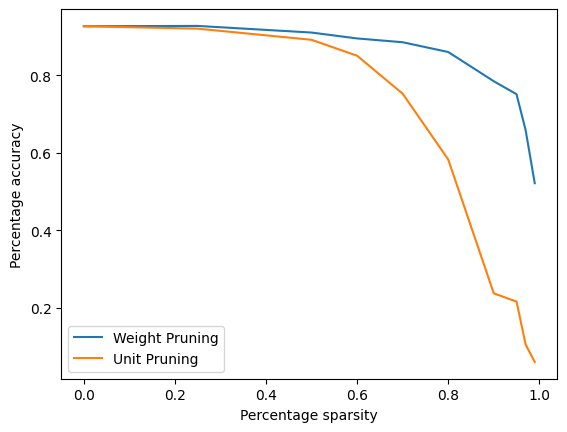

In [65]:
# Plot the sparsity vs accuracy graph using matplotlib

plt.plot(prune_percentage_data, weight_pruning_accuracy_data, label='Weight Pruning')
plt.plot(prune_percentage_data, unit_pruning_accuracy_data, label='Unit Pruning')

plt.legend(loc='lower left')
plt.xlabel('Percentage sparsity')
plt.ylabel('Percentage accuracy')
plt.show()

In [66]:

df = pd.DataFrame({'prune percentage':prune_percentage_data, 'weight pruning':weight_pruning_accuracy_data, 'unit pruning':unit_pruning_accuracy_data})


In [67]:
df

,prune percentage,weight pruning,unit pruning
0,0.00,0.9268,0.9268
1,0.25,0.9276,0.9206
2,0.50,0.9105,0.8918
3,0.60,0.8953,0.8507
4,0.70,0.8855,0.7527
5,0.80,0.8603,0.5830
6,0.90,0.7849,0.2375
7,0.95,0.7514,0.2162
8,0.97,0.6586,0.1052
9,0.99,0.5216,0.0604
